In [1]:
# Install if errors occur.  First run this cell, then reset runtime and start run from cell below.
!pip install --force-reinstall 'sqlalchemy<2.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.7/613.7 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: greenlet
    Found existing installation: greenlet 2.0.2
    Uninstalling greenlet-2.0.2:
      Successfully uninstalled greenlet-2.0.2
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.19
    Uninstalling SQLAlchemy-2.0.19:
      Successfully uninstalled SQLAlchemy-2.0.19


In [2]:
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sqlalchemy import create_engine, text

# Create an engine object
engine = create_engine('sqlite:///drive/MyDrive/schools_db', echo=False)
connection = engine

# Fetch all records from schools table
df = pd.read_sql_table('schools', connection)
print(df.head())

# Close the Database connection
engine.dispose()

       ID                                 Name    State     Region  \
0  100654             Alabama A & M University  Alabama  Southeast   
1  100663  University of Alabama at Birmingham  Alabama  Southeast   
2  100706  University of Alabama in Huntsville  Alabama  Southeast   
3  100724             Alabama State University  Alabama  Southeast   
4  100751            The University of Alabama  Alabama  Southeast   

   Applications  Admissions  Admission_Rate  Enrollment  SAT_Verbal_75  \
0          6560        4697        0.716006        1459            520   
1         11906       10541        0.885352        2361            680   
2          5781        4259        0.736724        1191            700   
3          5974        5854        0.979913         797            534   
4         42421       33472        0.789043        7540            680   

   SAT_Math_75  ACT_English_75  ACT_Math_75  
0          510              20           18  
1          708              33           2

In [5]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.8 MB/s eta 0:00:00


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
df.dtypes

ID                  int64
Name               object
State              object
Region             object
Applications        int64
Admissions          int64
Admission_Rate    float64
Enrollment          int64
SAT_Verbal_75       int64
SAT_Math_75         int64
ACT_English_75      int64
ACT_Math_75         int64
dtype: object

In [8]:
# Drop the non-beneficial ID columns, 'ACT_English_75' and 'ACT_Math_75 '.
df = df.drop(columns = ['ACT_English_75', 'ACT_Math_75', 'Name', 'ID', 'Admissions', 'Applications'])

In [9]:
# Look at State value counts for binning

state_count = df['State'].value_counts()
state_count

New York                121
Pennsylvania             93
California               84
Texas                    67
Massachusetts            59
Illinois                 51
Ohio                     51
North Carolina           49
Florida                  42
Georgia                  42
Indiana                  40
Virginia                 39
Michigan                 39
Wisconsin                34
Missouri                 34
Minnesota                33
Tennessee                32
South Carolina           30
New Jersey               27
Iowa                     26
Kentucky                 24
Alabama                  22
Connecticut              22
Kansas                   21
Maryland                 20
Louisiana                19
Washington               18
Oregon                   17
Arkansas                 16
West Virginia            15
Oklahoma                 15
Colorado                 15
Mississippi              14
Maine                    13
Nebraska                 11
New Hampshire       

In [10]:
# Choose a cutoff value and create a list of states to be replaced
# use the variable name `state_counts_to_replace`
state_counts_to_replace = list(state_count[state_count<5].index)
state_counts_to_replace

['Alaska', 'Delaware', 'Nevada', 'Wyoming']

In [11]:
# Replace in dataframe
for sta in state_counts_to_replace:
    df['State'] = df['State'].replace(sta,"Other")

# Check to make sure binning was successful
df['State'].value_counts()

New York                121
Pennsylvania             93
California               84
Texas                    67
Massachusetts            59
Ohio                     51
Illinois                 51
North Carolina           49
Florida                  42
Georgia                  42
Indiana                  40
Michigan                 39
Virginia                 39
Missouri                 34
Wisconsin                34
Minnesota                33
Tennessee                32
South Carolina           30
New Jersey               27
Iowa                     26
Kentucky                 24
Alabama                  22
Connecticut              22
Kansas                   21
Maryland                 20
Louisiana                19
Washington               18
Oregon                   17
Arkansas                 16
West Virginia            15
Oklahoma                 15
Colorado                 15
Mississippi              14
Maine                    13
Nebraska                 11
South Dakota        

In [12]:
# Determine the number of unique values in each column.
for x in df.columns:
    print(x, len(df[x].unique()))

State 48
Region 8
Admission_Rate 1353
Enrollment 920
SAT_Verbal_75 92
SAT_Math_75 95


In [13]:
# Look at Regions value counts for binning
regionbinning = df['Region'].value_counts()

In [14]:
# You may find it helpful to look at Regions value counts >1
regionclassification = regionbinning[regionbinning>1]
regionclassification

Southeast          344
Mid East           271
Great Lakes        215
Plains             143
Far West           131
New England        123
Southwest           94
Rocky Mountains     34
Name: Region, dtype: int64

In [15]:
# Choose a cutoff value and create a list of regions to be replaced
# use the variable name `regions_to_replace`
regions_to_replace = list (regionbinning[regionbinning<30].index)
regions_to_replace

# Replace in dataframe
for rgn in regions_to_replace:
    df['Region'] = df['Region'].replace(rgn,"Other")

# Check to make sure binning was successful
df['Region'].value_counts()

Southeast          344
Mid East           271
Great Lakes        215
Plains             143
Far West           131
New England        123
Southwest           94
Rocky Mountains     34
Name: Region, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(df,dtype=float)
df.head()

,Admission_Rate,Enrollment,SAT_Verbal_75,SAT_Math_75,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_West Virginia,State_Wisconsin,Region_Far West,Region_Great Lakes,Region_Mid East,Region_New England,Region_Plains,Region_Rocky Mountains,Region_Southeast,Region_Southwest
0,0.716006,1459,520,510,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.885352,2361,680,708,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.736724,1191,700,720,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.979913,797,534,516,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.789043,7540,680,690,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = df['Admission_Rate'].values

#drop column Admission_Rate
X = df.drop('Admission_Rate', axis=1).values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hn_layer1=7
hn_layer2=14
hn_layer3=21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer2, activation='relu'))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 420       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
27/27 [==============================] - 2s 18ms/step - loss: 0.6432 - accuracy: 0.0023 - val_loss: 0.6216 - val_accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.0023 - val_loss: 0.6115 - val_accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.0023 - val_loss: 0.6116 - val_accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.0023 - val_loss: 0.6099 - val_accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.0023 - val_loss: 0.6092 - val_accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5758 - accuracy: 0.0023 - val_loss: 0.6083 - val_accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.0023 - val_loss: 0.6085 - val_accur

<Axes: >

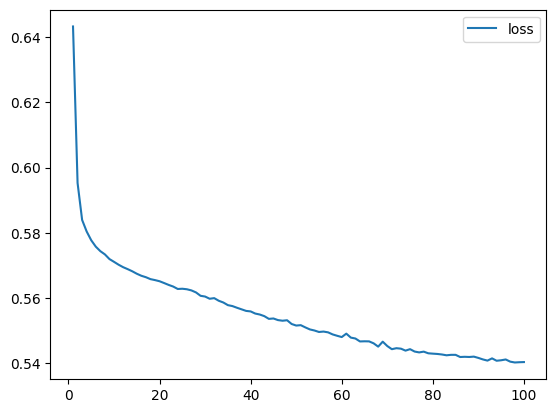

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

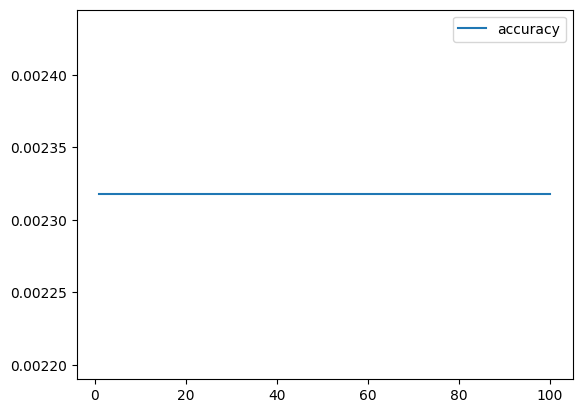

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.5672 - accuracy: 0.0029 - 25ms/epoch - 2ms/step
Loss: 0.5671688318252563, Accuracy: 0.0029498524963855743
